<a href="https://colab.research.google.com/github/Rus320/Face-regconiztion/blob/main/lab2_2_SVM_team2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary library

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy import stats

<ipython-input-1-dd216727775a>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Import dataset: We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures. A fetcher for the dataset is built into Scikit-Learn:


In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Plot some face we gonna working with

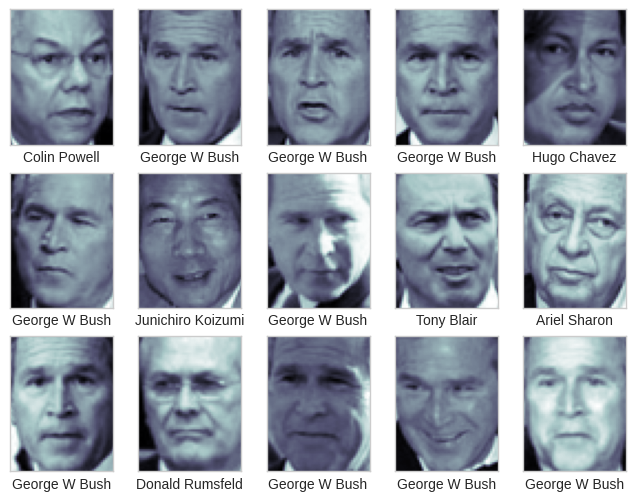

In [3]:
fig, ax = plt.subplots(3, 5, figsize=(8, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

packaging the preprocessor and the classifier into a single pipeline:

In [29]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True,
          svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Split dataset into test and train size with 20/80 percent

In [30]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, train_size = 0.8,
                                                random_state=42)

Finally, we can use grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel), and determine the best model:

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [ 1,5,10,20,50 ],
              'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print('best estimator parameters is: ')
print(grid.best_params_)


CPU times: user 1min 5s, sys: 44.6 s, total: 1min 50s
Wall time: 1min 12s
best estimator parameters is: 
{'svc__C': 1, 'svc__gamma': 0.005}


In [110]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [ 5 ],
              'svc__gamma':[0.001]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print('best estimator parameters is: ')
print(grid.best_params_)


CPU times: user 4.57 s, sys: 3.81 s, total: 8.38 s
Wall time: 4.62 s
best estimator parameters is: 
{'svc__C': 5, 'svc__gamma': 0.001}


train model

In [111]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Plot some example of test images when we predict in testfiles

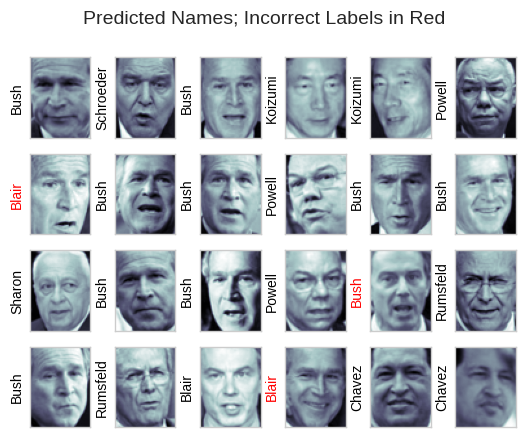

In [68]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [112]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.77      0.83      0.80        12
     Colin Powell       0.85      0.90      0.88        51
  Donald Rumsfeld       0.76      0.88      0.81        25
    George W Bush       0.94      0.86      0.90        98
Gerhard Schroeder       0.84      0.76      0.80        21
      Hugo Chavez       0.77      0.67      0.71        15
Junichiro Koizumi       0.91      1.00      0.95        10
       Tony Blair       0.86      0.95      0.90        38

         accuracy                           0.87       270
        macro avg       0.84      0.86      0.84       270
     weighted avg       0.87      0.87      0.87       270



We might also display the confusion matrix between these classes (see the following figure):

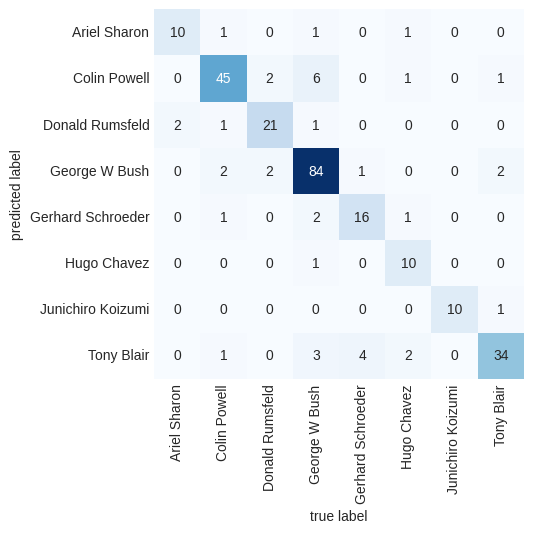

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues',
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');